<a href="https://colab.research.google.com/github/SanthoshNagaraj94/iris_prediction_app/blob/main/the_knn_model_for_this_iris_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN ALGORITHM FOR IRIS DATASET 

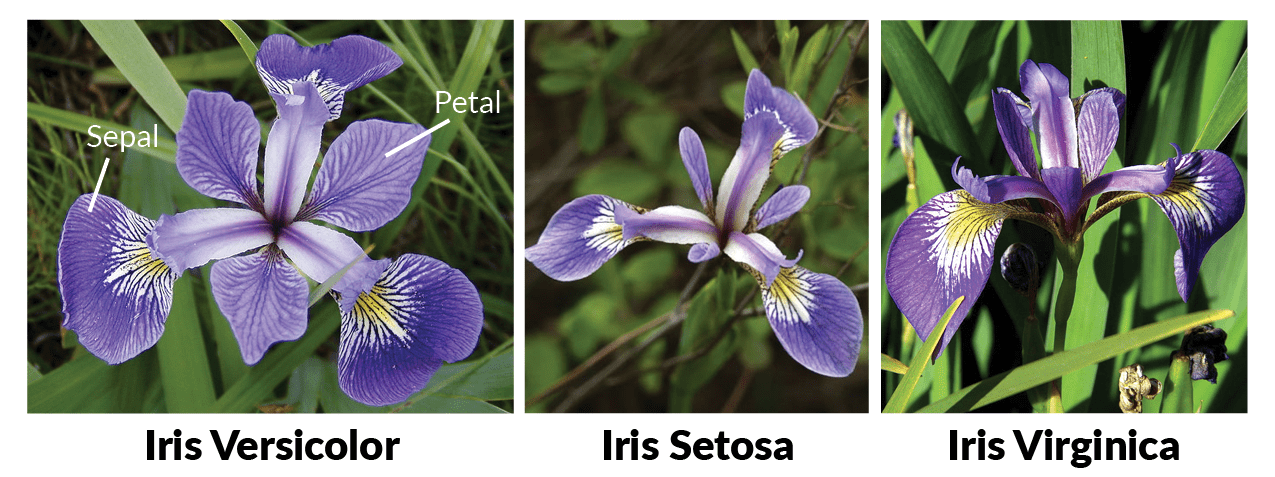

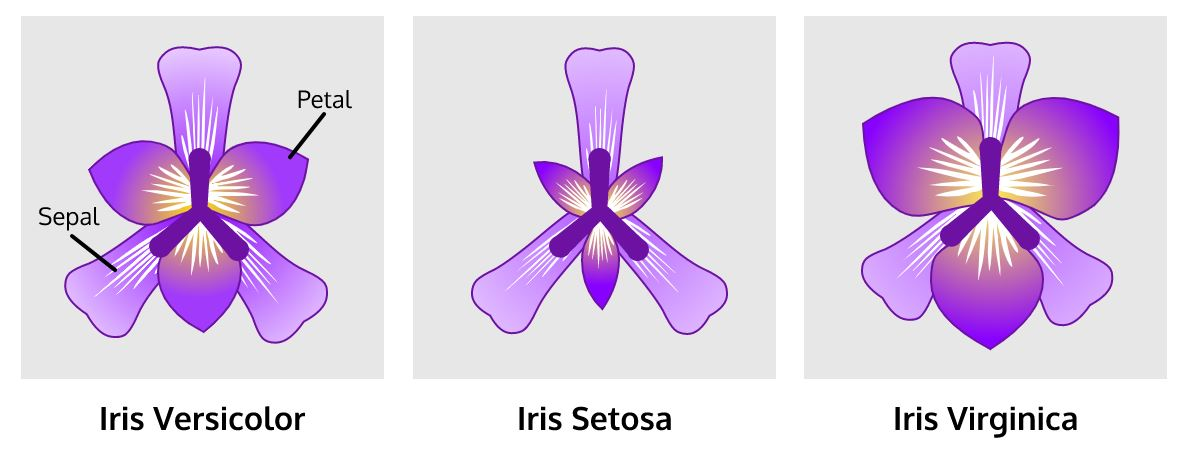

IMPORTING BASIC LIBIRARIES NEED FOR 


*   DATA HANDLING(PANDAS)
*   MATHEMATICAL OPERATION NUMPY
*   DATA VISUVALIZATION MATPLOTLIB AND SEABORN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

IMPORT THE IRIS DATASET FROM THE SKLEARN DATA SET

In [ ]:
iris_data=pd.read_csv("Iris.csv")

DISPLAYING HEAD VALUES OF IRIS_DATA

In [ ]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**CHECKING THE NULL OR NaN DATA PRESENT IN THE DATASET**

In [ ]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

PLOTING A PAIR POLT OF EACH FEATURES AGAINST TARGET


**TARGET**

*   0.0-setosa
*   1.0-versicolor
*   2.0-virginica





/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


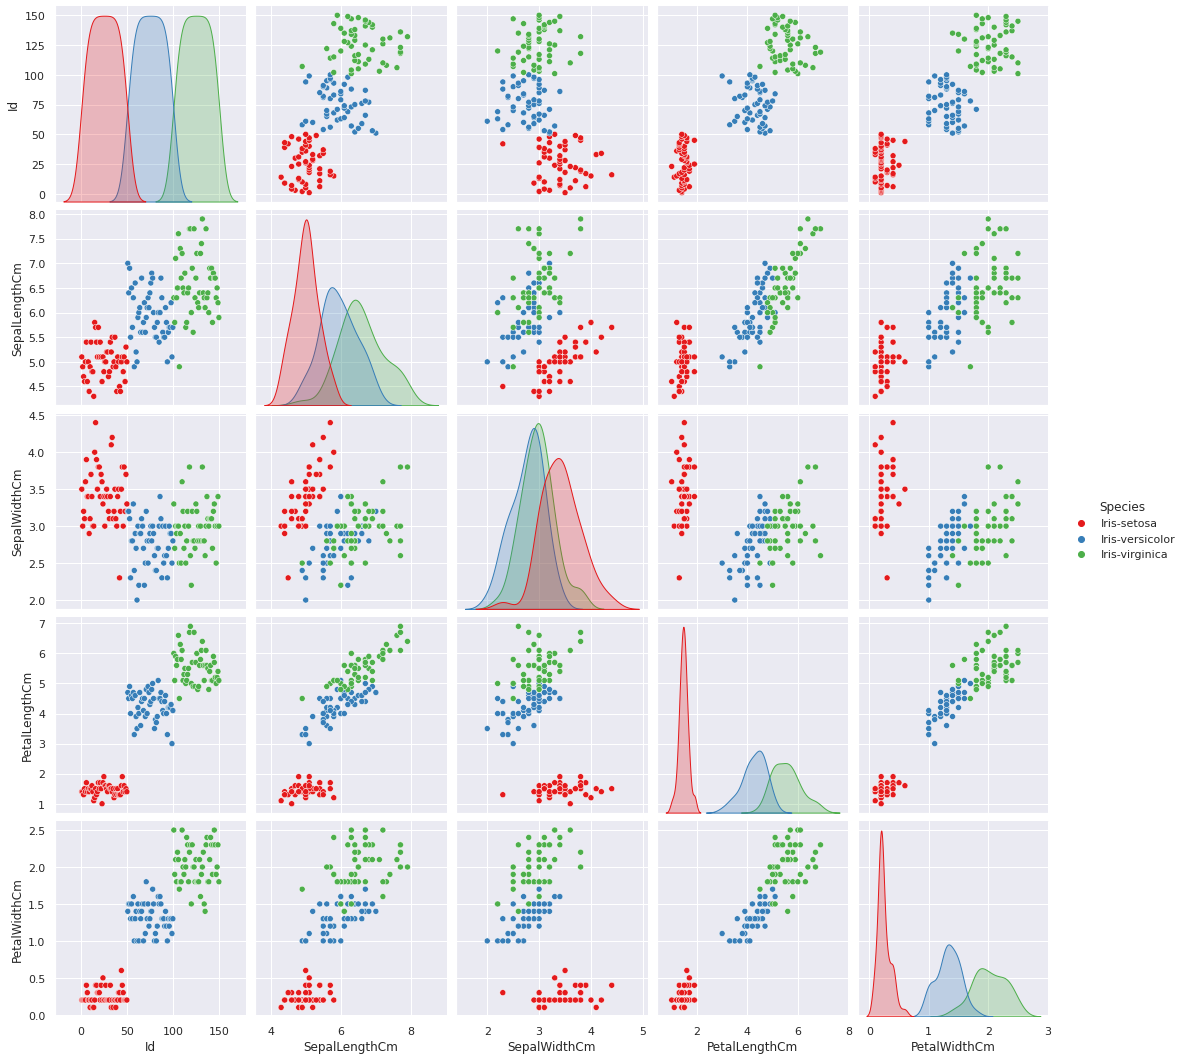

In [ ]:
sns.pairplot(iris_data, hue='Species', size=3 ,palette='Set1')

**3Dplotting** relationship between features and the target using ploty.express  

In [ ]:
import plotly.express as px

In [ ]:
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
px.scatter_3d(iris_data, x="PetalLengthCm", y="PetalWidthCm", z="SepalLengthCm", size="SepalWidthCm", 
              color="Species", color_discrete_map = {"versicolor": 'orange', "setosa": "violet", "virginica":"blue"})

PLOTTING THE HEATMAP FOR THE IRIS DATA TO FIND THE REATIONSHIP OF TARGET AND EACH FEATUES
 IN THIS I FOUND THAT THE PETAL WIDTH MOSTLY INFUENCE THE TARGET TO THE NEAREST RELATIONSHIP

ASSIGNING THE TARGET TO THE VARIABLE **"Y"**

In [ ]:
Y=iris_data["Species"]
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

ASSIGNING ALL THE FEATURES TO THE VARIABLE **"X" **BY DROPING THE TARGET FROM THE IRIS DATA

In [ ]:
X_old=iris_data.drop("Species", axis=1)



In [ ]:
X=X_old.drop("Id", axis=1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


SPLITTING THE TEST AND TRAIN DATA OF IRIS DATA SET USING TEST_TRAIN_SPLIT MODULE OF SKLEARN.MODEL_SELECTION

In [ ]:

from sklearn.model_selection import train_test_split

SPLITING THE TEST AND TRAIN DATA OF IRIS DATA ASIGN TEST **DATA 20% AND TRAIN DATA 80%**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

BY USING STANDARDSCALER FROM SKLEARN.PREPROCESSING TO **NORMALIZE** THE DATAS FROM THE DATA SET FOR BOTH TEST AND TRAIN DATAS

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
  std_scale = StandardScaler()
  std_scale.fit(X_train)
  X_train_std = std_scale.transform(X_train)
  X_test_std = std_scale.transform(X_test)

NORMALIZED TRAIN_X VALUE

In [ ]:
X_train_std

array([[-1.81770212, -0.11879105, -1.55532318, -1.47243107],
       [-0.08949637, -0.6025946 ,  0.685863  ,  1.43853012],
       [-0.20471009, -1.08639816, -0.21061147, -0.3333593 ],
       [-0.08949637, -0.84449638,  0.12556646, -0.3333593 ],
       [-0.78077867,  0.84881605, -1.38723421, -1.34586754],
       [ 0.3713585 , -0.6025946 ,  0.51777404,  0.67914894],
       [ 0.14093106, -2.05400526,  0.62983335,  0.29945835],
       [ 0.25614478, -0.6025946 ,  0.0695368 ,  0.04633129],
       [-0.20471009, -0.6025946 ,  0.34968508,  0.04633129],
       [-1.58727469, -1.81210349, -1.44326387, -1.21930401],
       [-0.20471009, -1.32829993,  0.62983335,  0.932276  ],
       [-1.47206097,  0.3650125 , -1.38723421, -1.34586754],
       [-0.89599239, -1.32829993, -0.49075974, -0.20679577],
       [ 0.60178593, -0.6025946 ,  0.96601128,  1.05883953],
       [-1.24163354,  0.84881605, -1.27517491, -1.34586754],
       [-0.43513752, -1.81210349,  0.0695368 ,  0.04633129],
       [-0.43513752, -1.

NORMALIZED TEST_X VALUE

In [ ]:
X_test_std

array([[-0.20471009, -0.11879105,  0.18159611, -0.08023224],
       [ 0.14093106, -2.05400526,  0.0695368 , -0.3333593 ],
       [ 1.17785451,  0.12311073,  0.85395197,  1.05883953],
       [ 0.14093106, -0.84449638,  0.685863  ,  0.42602188],
       [-1.0112061 ,  0.84881605, -1.27517491, -1.09274048],
       [-0.08949637,  2.30022671, -1.49929352, -1.34586754],
       [-1.12641982,  0.12311073, -1.33120456, -1.47243107],
       [ 0.14093106, -0.36069283,  0.34968508,  0.29945835],
       [-1.0112061 ,  1.09071783, -1.27517491, -0.83961342],
       [-0.43513752, -1.57020171, -0.04252251, -0.20679577],
       [ 1.7539231 , -0.6025946 ,  1.24615955,  0.80571247],
       [ 0.25614478, -1.08639816,  0.96601128,  0.17289482],
       [-1.0112061 ,  1.09071783, -1.44326387, -1.21930401],
       [-1.7024884 ,  0.3650125 , -1.44326387, -1.34586754],
       [-1.0112061 ,  0.3650125 , -1.49929352, -1.34586754],
       [-0.89599239,  0.60691428, -1.21914525, -0.96617695],
       [-0.43513752, -1.

VISUVALISING THE NON STANDARD DATA(**NOT NORMALIZED**) USING HEAT MAP 

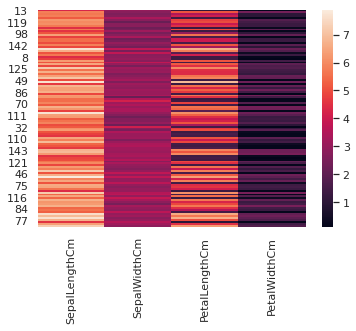

In [ ]:
sns.heatmap(X_train)

VISUVALISING THE STANDARD DATA(**NORMALIZED**) USING HEAT MAP 

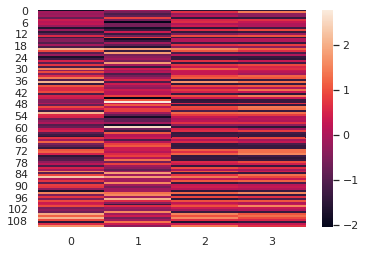

In [ ]:
sns.heatmap(X_train_std)

IMPORT THE KNeighborsClassifier FROM THE sklearn.neighbors FOR FIND TO PERFORM THE TRAING USING KNN ALGORITHM AND ASSIGN NEIGHBOURS=5


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
y_predict=knn.predict(X_test)
y_predict

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        38
      macro avg       0.96      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

[[15  0  0]
 [ 0 14  1]
 [ 0  0  8]]


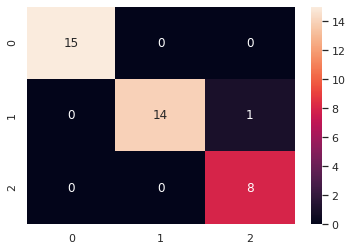

In [ ]:
cf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(cf_matrix, annot=True)

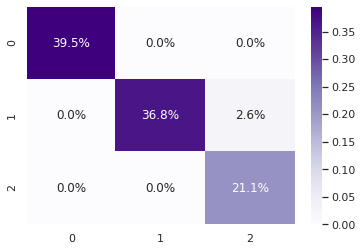

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.1%', cmap='Purples')

IMPORTING ACCURACY SCORE MODULE FROM SKLEARN.METRICS TO GET THE ACCURACY OF TEST AND PREDICTED DATASET

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_predict)
print("THE ACCURACY OF THE KNN MODEL FOR THIS IRIS DATA SET  : ",(accuracy*100),"%")

THE ACCURACY OF THE KNN MODEL FOR THIS IRIS DATA SET  :  97.36842105263158 %
